In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Amazon Sale Report.csv")
df.head() 

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [74]:
df.shape

(128976, 21)

In [75]:
df = df.drop(['PendingS', 'New'], axis="columns")

In [76]:
# NULL VALUES
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [77]:
df.dropna(axis="columns") 
df.isnull().sum() 

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

# Data Analysis


##### 1. Sales Analysis

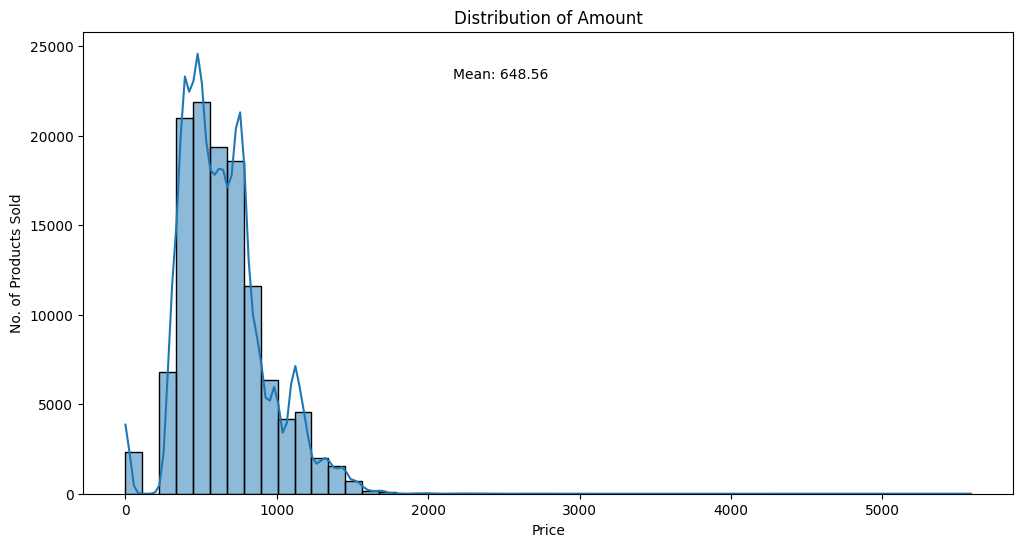

In [78]:
# Distribution of Amount
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Price')
plt.ylabel('No. of Products Sold')
# Calculate additional information
mean_amount = df['Amount'].mean()

# Show additional information at the top
plt.text(0.5, 0.9, f'Mean: {mean_amount:.2f}', ha='right', transform=plt.gca().transAxes)

plt.show()

##### 2. Product Analysis

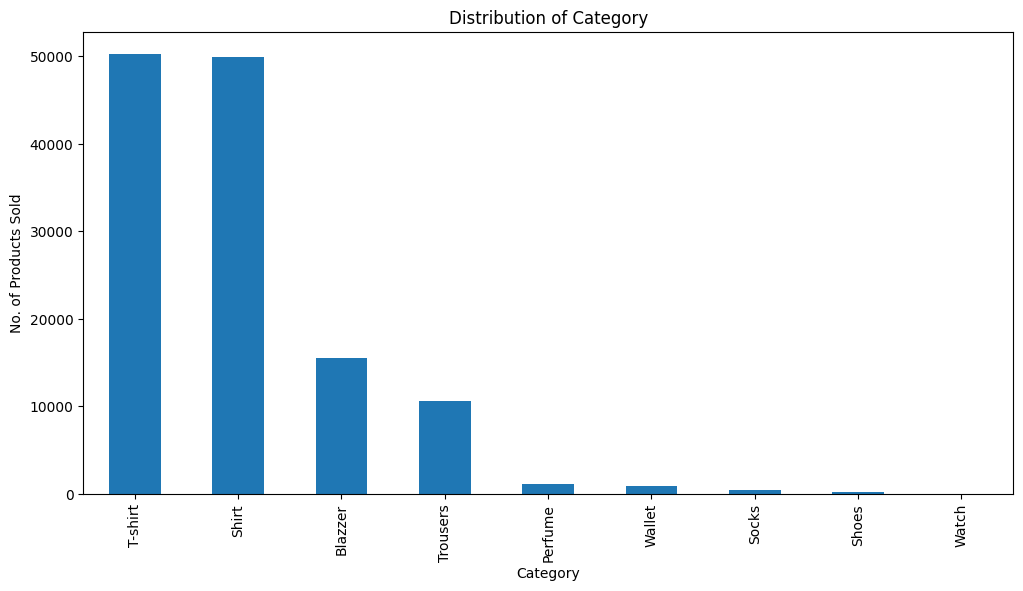

In [79]:
# Group data by a categorical variable and calculate the aggregate value

tempdf = df['Category'].value_counts()

plt.figure(figsize=(12, 6))
tempdf.plot(kind='bar')

plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('No. of Products Sold')
plt.show()

##### 3. Fullfillment Analysis

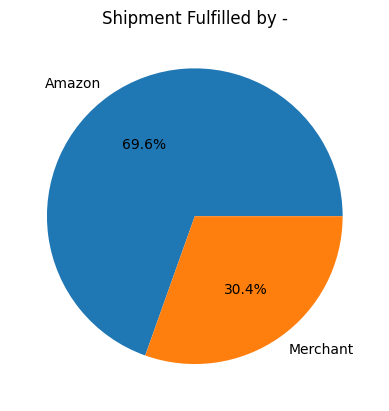

In [80]:
tempdf = df['Fulfilment'].value_counts()
plt.pie(tempdf.values, labels = tempdf.index, autopct='%1.1f%%')
plt.title('Shipment Fulfilled by -')
plt.show()

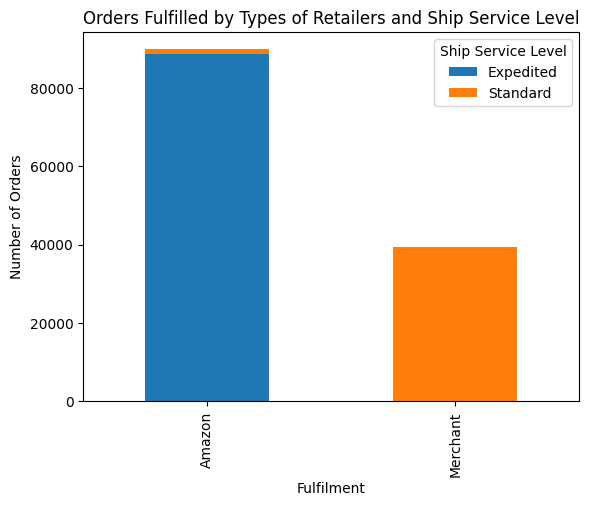

In [81]:
# Group by 'Fulfilment' and 'ship-service-level' and count occurrences
grouped_df = df.groupby(['Fulfilment', 'ship-service-level']).size().unstack(fill_value=0)

# Plotting
grouped_df.plot(kind='bar', stacked=True)

plt.title('Orders Fulfilled by Types of Retailers and Ship Service Level')
plt.xlabel('Fulfilment')
plt.ylabel('Number of Orders')
plt.legend(title='Ship Service Level')
plt.show()

##### 4. Customer Segmentation

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


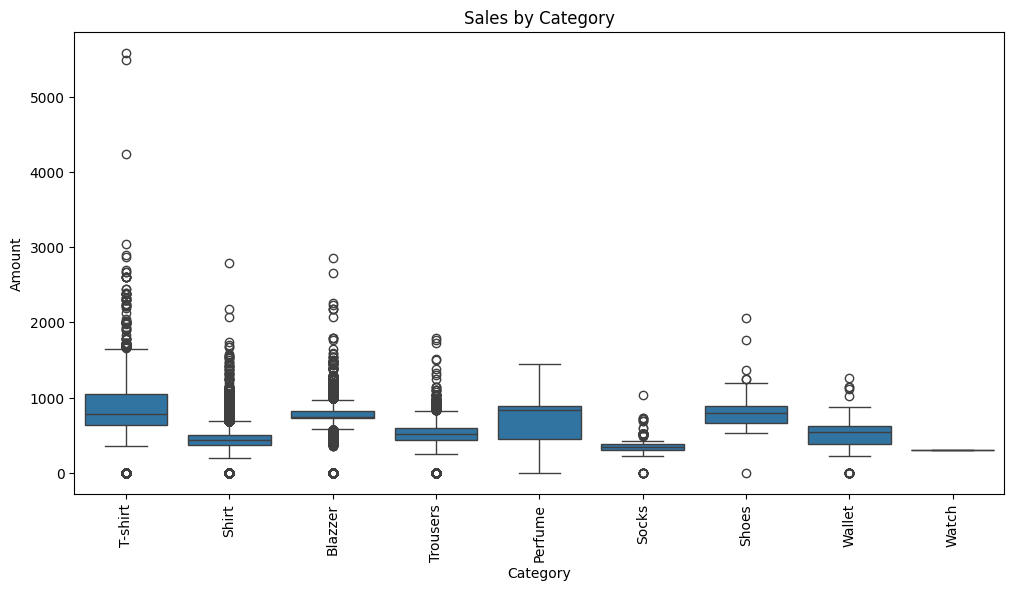

In [82]:
# Sales by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=df)
plt.title('Sales by Category')
plt.xticks(rotation=90)
plt.show()

##### 5. Geographical Analysis

In [83]:
df['ship-country'].value_counts()

ship-country
IN    128941
Name: count, dtype: int64

Text(0, 0.5, 'No. of Products Sold')

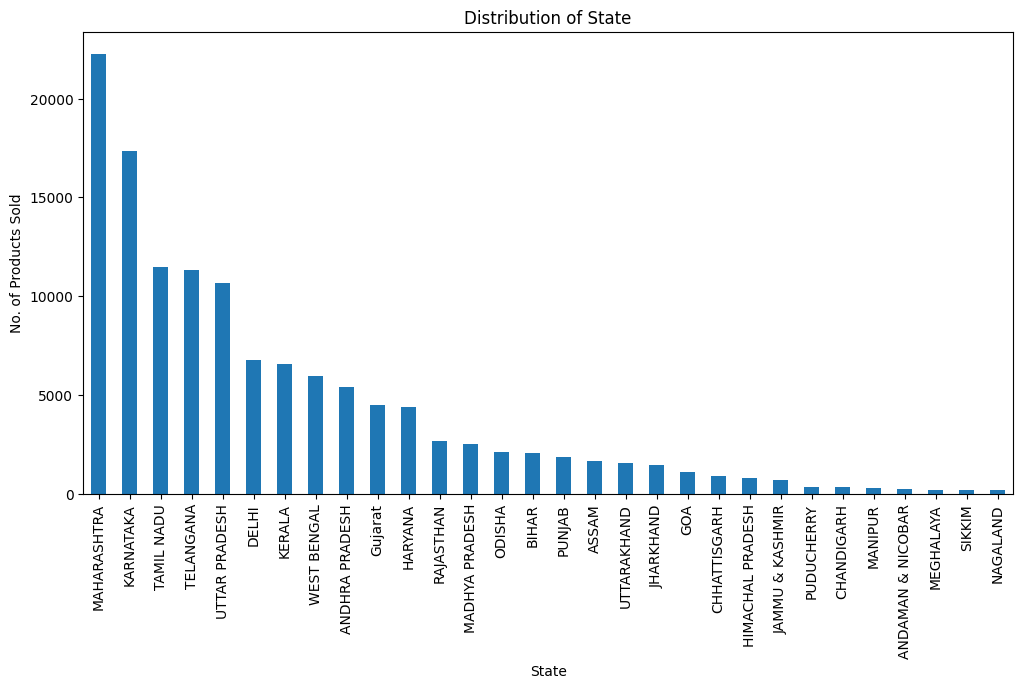

In [84]:
# Group data by a categorical variable and calculate the aggregate value

tempdf = df['ship-state'].value_counts().head(30)

plt.figure(figsize=(12, 6))
tempdf.plot(kind='bar')

plt.title('Distribution of State')
plt.xlabel('State')
plt.ylabel('No. of Products Sold')

# Conclusions
- Sales Analysis - a. Most Selling Products Costi approx - 650/-

- Product Analysis - a. Most Selling Products are Upperwear such as T-Shirt, Shirt, Blazer b. Least Selling Products are Shoes and Watch

- Fulfillment Analysis - a. Most Shipments (69.6%) are Fulfilled by Amazon, Rest of the shipments are by Merchants (30.4%) b. Shipments fulfilled by Amazon are mostly expedited c. Shipments by Merchant are standard only

- Customer Segmentation - a. Most People Spend around 800 on all products b. Some people spend upto 3000 for upperwear products

- Geographical Analysis - a. Most Products are sold in - Maharashtra, Karnataka